In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
import seaborn as sns

In [ ]:
try:
    os.chdir("/content/drive/MyDrive/Colab Notebooks")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [ ]:
cleaned_df = pd.read_csv('Data/suicide_detection_full_cleaned.csv')

In [ ]:
cleaned_df.dropna(subset=['cleaned_text'], inplace=True)

# Convert the 'cleaned_text' column to strings (in case some values are not strings)
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].astype(str)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_df['cleaned_text'])
word_freq = pd.DataFrame(tokenizer.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)

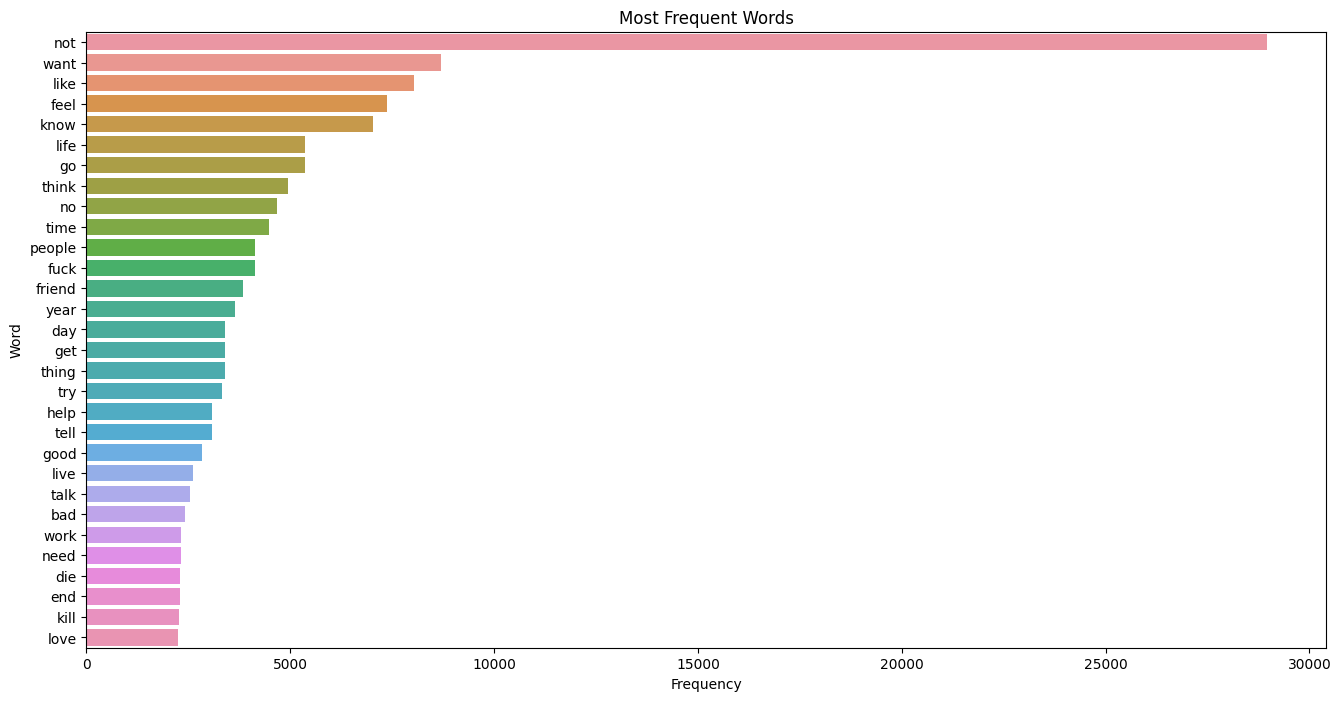

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq.iloc[:30])
plt.title('Most Frequent Words')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [ ]:
# Remove rows with text length 0
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split())!=0)]
cleaned_df.reset_index(drop=True, inplace=True)

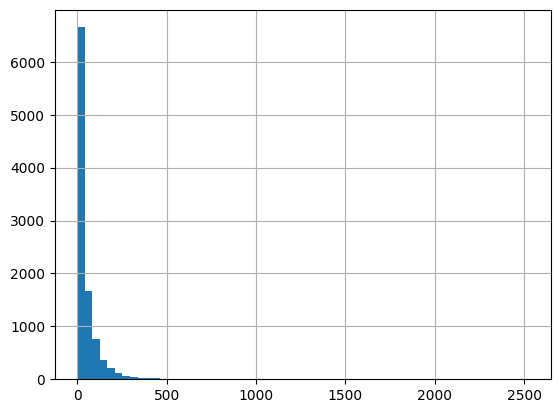

count    9996.000000
mean       51.037715
std        80.725992
min         1.000000
25%        11.000000
50%        24.000000
75%        60.000000
max      2524.000000
dtype: float64


In [ ]:
# Get word count of posts
posts_len = [len(x.split()) for x in cleaned_df['cleaned_text']]
pd.Series(posts_len).hist(bins=60)
plt.show()
print(pd.Series(posts_len).describe())

In [ ]:
# Subset dataset to obtain rows with less than or equal to 62 words
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split())<=60)]
cleaned_df.reset_index(drop=True, inplace=True)


In [ ]:
cleaned_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/suicide_detection_final_cleaned.csv', index=False)